<a href="https://colab.research.google.com/github/Yennybel01/Trabajos_IA/blob/main/Algoritmo%20A*.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciudades disponibles:
1. Arad
2. Bucarest
3. Craiova
4. Drobeta
5. Eforie
6. Fagaras
7. Giurgiu
8. Hirsova
9. Iasi
10. Lugoj
11. Mehadia
12. Neamt
13. Oradea
14. Pitesti
15. Rimnicu Vilcea
16. Sibiu
17. Timisoara
18. Urziceni
19. Vaslui
20. Zerind

Ingrese el nombre de la ciudad de inicio: Arad

Buscando ruta más corta de Arad a Bucarest...

¡Camino encontrado!
Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucarest
Distancia total: 418 km
Tiempo de ejecución: 0.0001 segundos
Nodos explorados: 6

Visualizando el proceso de búsqueda...


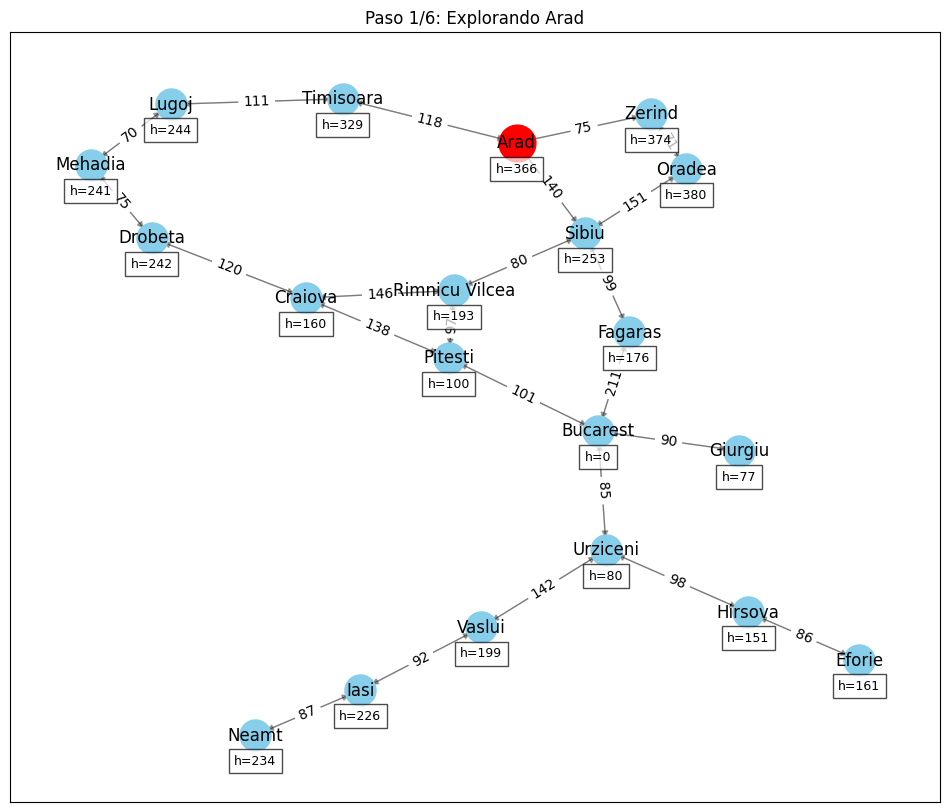

<Figure size 640x480 with 0 Axes>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
from matplotlib.animation import FuncAnimation

class Grafo:
    def __init__(self):
        self.grafo = nx.DiGraph()
        self.heuristica = {}  # Heurística (distancia en línea recta a Bucarest)

    def agregar_nodo(self, nombre, heuristica_a_bucarest):
        """Agrega un nodo al grafo con su heurística (distancia en línea recta a Bucarest)"""
        self.grafo.add_node(nombre)
        self.heuristica[nombre] = heuristica_a_bucarest

    def agregar_conexion(self, origen, destino, peso):
        """Agrega una conexión entre dos nodos con su peso (distancia)"""
        self.grafo.add_edge(origen, destino, peso=peso)
        self.grafo.add_edge(destino, origen, peso=peso)  # Conexión bidireccional

    def obtener_vecinos(self, nodo):
        """Retorna los vecinos de un nodo y sus pesos"""
        return [(vecino, self.grafo[nodo][vecino]['peso']) for vecino in self.grafo.neighbors(nodo)]

    def a_estrella(self, inicio, destino='Bucarest', visualizar=True):
        """
        Implementa el algoritmo A* para encontrar la ruta más corta de inicio a destino.
        Retorna el camino y un registro del proceso de expansión de nodos para visualización.
        """
        # Lista de nodos abiertos (por explorar): (f_score, nodo, camino, g_score)
        abiertos = [(self.heuristica[inicio], inicio, [inicio], 0)]
        heapq.heapify(abiertos)

        # Conjunto de nodos cerrados (ya explorados)
        cerrados = set()

        # Para visualización: registra el proceso de expansión
        historial_expansion = []

        while abiertos:
            # Obtener el nodo con menor f_score
            f_actual, actual, camino, g_actual = heapq.heappop(abiertos)

            # Si el nodo ya fue explorado, continuar
            if actual in cerrados:
                continue

            # Registrar la expansión para visualización
            historial_expansion.append({
                'nodo_actual': actual,
                'camino_actual': camino.copy(),
                'nodos_abiertos': [(f, n, p, g) for f, n, p, g in abiertos],
                'nodos_cerrados': list(cerrados)
            })

            # Si llegamos al destino, terminamos
            if actual == destino:
                return camino, historial_expansion

            # Marcar el nodo actual como explorado
            cerrados.add(actual)

            # Expandir el nodo actual (explorar vecinos)
            for vecino, peso in self.obtener_vecinos(actual):
                if vecino in cerrados:
                    continue

                # Calcular g_score (costo desde inicio hasta vecino)
                g_vecino = g_actual + peso

                # Calcular f_score = g_score + heurística
                f_vecino = g_vecino + self.heuristica[vecino]

                # Agregar vecino a lista de abiertos
                nuevo_camino = camino + [vecino]
                heapq.heappush(abiertos, (f_vecino, vecino, nuevo_camino, g_vecino))

        # Si no hay camino
        return None, historial_expansion

    def visualizar_proceso(self, historial_expansion, camino_final=None):
        """
        Crea una visualización del proceso de expansión de nodos durante A*
        """
        if not historial_expansion:
            print("No hay datos para visualizar")
            return

        # Crear una figura grande
        fig, ax = plt.subplots(figsize=(12, 10))

        # Posiciones de los nodos (fijas durante toda la animación)
        pos = nx.spring_layout(self.grafo, seed=42)

        def actualizar(i):
            ax.clear()

            # Obtener el estado actual
            estado = historial_expansion[i]
            nodo_actual = estado['nodo_actual']
            camino_actual = estado['camino_actual']
            nodos_cerrados = estado['nodos_cerrados']

            # Dibujar el grafo completo
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, alpha=0.3)

            # Dibujar todos los nodos con color por defecto
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, node_color='skyblue', node_size=500)

            # Nodos cerrados (ya explorados) en gris
            if nodos_cerrados:
                nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=nodos_cerrados,
                                      node_color='grey', node_size=500)

            # Camino actual en verde, excepto el nodo actual
            if len(camino_actual) > 1:
                nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=camino_actual[:-1],
                                      node_color='green', node_size=500)

            # Nodo actual en rojo
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=[nodo_actual],
                                  node_color='red', node_size=700)

            # Bordes del camino actual en verde
            camino_edges = [(camino_actual[j], camino_actual[j+1]) for j in range(len(camino_actual)-1)]
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, edgelist=camino_edges,
                                  edge_color='green', width=3)

            # Etiquetas de nodos
            nx.draw_networkx_labels(self.grafo, pos, ax=ax)

            # Etiquetas de aristas (distancias)
            edge_labels = {(u, v): d['peso'] for u, v, d in self.grafo.edges(data=True)}
            nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, ax=ax)

            # Agregar título
            ax.set_title(f"Paso {i+1}/{len(historial_expansion)}: Explorando {nodo_actual}")

            # Añadir información de heurística
            for nodo in self.grafo.nodes():
                x, y = pos[nodo]
                ax.text(x, y-0.08, f"h={self.heuristica[nodo]}",
                        horizontalalignment='center', size=9,
                        bbox=dict(facecolor='white', alpha=0.7))

        # Crear animación
        ani = FuncAnimation(fig, actualizar, frames=len(historial_expansion), interval=1000, repeat=False)

        # Si hay un camino final, mostrarlo al final
        if camino_final and len(camino_final) > 1:
            # Esperar a que termine la animación
            plt.pause(len(historial_expansion))

            ax.clear()

            # Dibujar el grafo completo
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, alpha=0.3)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, node_color='skyblue', node_size=500)

            # Resaltar el camino final
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=camino_final,
                                  node_color='green', node_size=700)

            # Bordes del camino final
            camino_edges = [(camino_final[j], camino_final[j+1]) for j in range(len(camino_final)-1)]
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, edgelist=camino_edges,
                                  edge_color='green', width=3)

            # Etiquetas
            nx.draw_networkx_labels(self.grafo, pos, ax=ax)
            edge_labels = {(u, v): d['peso'] for u, v, d in self.grafo.edges(data=True)}
            nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, ax=ax)

            # Título
            ax.set_title(f"Camino final encontrado: {' -> '.join(camino_final)}")

        plt.tight_layout()
        plt.show()

def main():
    # Crear grafo con ciudades de Rumania
    grafo = Grafo()

    # Agregar ciudades (nodos) con su heurística a Bucarest
    grafo.agregar_nodo("Arad", 366)
    grafo.agregar_nodo("Bucarest", 0)
    grafo.agregar_nodo("Craiova", 160)
    grafo.agregar_nodo("Drobeta", 242)
    grafo.agregar_nodo("Eforie", 161)
    grafo.agregar_nodo("Fagaras", 176)
    grafo.agregar_nodo("Giurgiu", 77)
    grafo.agregar_nodo("Hirsova", 151)
    grafo.agregar_nodo("Iasi", 226)
    grafo.agregar_nodo("Lugoj", 244)
    grafo.agregar_nodo("Mehadia", 241)
    grafo.agregar_nodo("Neamt", 234)
    grafo.agregar_nodo("Oradea", 380)
    grafo.agregar_nodo("Pitesti", 100)
    grafo.agregar_nodo("Rimnicu Vilcea", 193)
    grafo.agregar_nodo("Sibiu", 253)
    grafo.agregar_nodo("Timisoara", 329)
    grafo.agregar_nodo("Urziceni", 80)
    grafo.agregar_nodo("Vaslui", 199)
    grafo.agregar_nodo("Zerind", 374)

    # Agregar conexiones (aristas) con sus distancias
    grafo.agregar_conexion("Arad", "Zerind", 75)
    grafo.agregar_conexion("Arad", "Sibiu", 140)
    grafo.agregar_conexion("Arad", "Timisoara", 118)
    grafo.agregar_conexion("Bucarest", "Fagaras", 211)
    grafo.agregar_conexion("Bucarest", "Pitesti", 101)
    grafo.agregar_conexion("Bucarest", "Giurgiu", 90)
    grafo.agregar_conexion("Bucarest", "Urziceni", 85)
    grafo.agregar_conexion("Craiova", "Drobeta", 120)
    grafo.agregar_conexion("Craiova", "Rimnicu Vilcea", 146)
    grafo.agregar_conexion("Craiova", "Pitesti", 138)
    grafo.agregar_conexion("Drobeta", "Mehadia", 75)
    grafo.agregar_conexion("Eforie", "Hirsova", 86)
    grafo.agregar_conexion("Fagaras", "Sibiu", 99)
    grafo.agregar_conexion("Hirsova", "Urziceni", 98)
    grafo.agregar_conexion("Iasi", "Vaslui", 92)
    grafo.agregar_conexion("Iasi", "Neamt", 87)
    grafo.agregar_conexion("Lugoj", "Timisoara", 111)
    grafo.agregar_conexion("Lugoj", "Mehadia", 70)
    grafo.agregar_conexion("Oradea", "Zerind", 71)
    grafo.agregar_conexion("Oradea", "Sibiu", 151)
    grafo.agregar_conexion("Pitesti", "Rimnicu Vilcea", 97)
    grafo.agregar_conexion("Rimnicu Vilcea", "Sibiu", 80)
    grafo.agregar_conexion("Urziceni", "Vaslui", 142)

    # Solicitar la ciudad de inicio
    ciudades_disponibles = sorted(list(grafo.grafo.nodes()))
    print("Ciudades disponibles:")
    for i, ciudad in enumerate(ciudades_disponibles, 1):
        print(f"{i}. {ciudad}")

    while True:
        ciudad_inicio = input("\nIngrese el nombre de la ciudad de inicio: ")
        if ciudad_inicio in grafo.grafo.nodes():
            break
        else:
            print(f"Ciudad '{ciudad_inicio}' no encontrada. Por favor, intente de nuevo.")

    print(f"\nBuscando ruta más corta de {ciudad_inicio} a Bucarest...")

    # Encontrar el camino más corto con A*
    tiempo_inicio = time.time()
    camino, historial = grafo.a_estrella(ciudad_inicio)
    tiempo_fin = time.time()

    if camino:
        print("\n¡Camino encontrado!")
        print(" -> ".join(camino))

        # Calcular distancia total
        distancia_total = 0
        for i in range(len(camino) - 1):
            distancia_total += grafo.grafo[camino[i]][camino[i+1]]['peso']

        print(f"Distancia total: {distancia_total} km")
        print(f"Tiempo de ejecución: {tiempo_fin - tiempo_inicio:.4f} segundos")
        print(f"Nodos explorados: {len(historial)}")

        # Visualizar el proceso
        print("\nVisualizando el proceso de búsqueda...")
        grafo.visualizar_proceso(historial, camino)
    else:
        print("No se encontró un camino a Bucarest")

if __name__ == "__main__":
    main()

In [ ]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


Ciudades disponibles:
1. Arad
2. Bucarest
3. Craiova
4. Drobeta
5. Eforie
6. Fagaras
7. Giurgiu
8. Hirsova
9. Iasi
10. Lugoj
11. Mehadia
12. Neamt
13. Oradea
14. Pitesti
15. Rimnicu Vilcea
16. Sibiu
17. Timisoara
18. Urziceni
19. Vaslui
20. Zerind

Ingrese el nombre de la ciudad de inicio: Arad

Buscando ruta más corta de Arad a Bucarest...

¡Camino encontrado!
Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucarest
Distancia total: 418 km
Tiempo de ejecución: 0.0003 segundos
Nodos explorados: 6

Visualizando el proceso de búsqueda en el mapa...


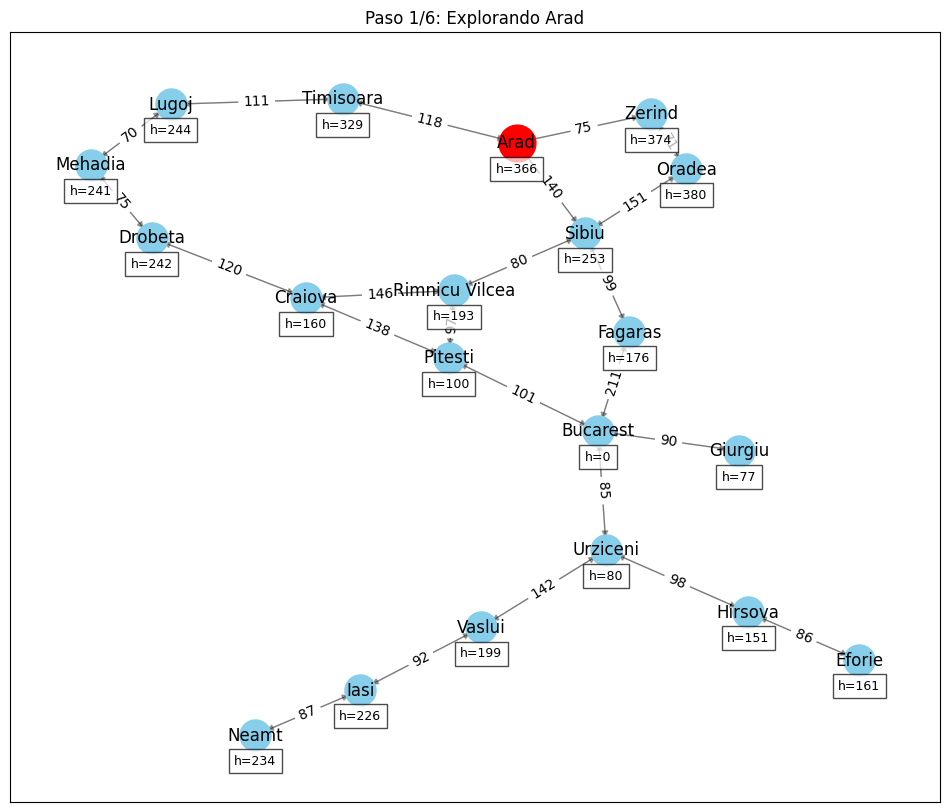

<Figure size 640x480 with 0 Axes>


Generando visualización del árbol de búsqueda A*...
Árbol de búsqueda A* generado. 16 nodos explorados.


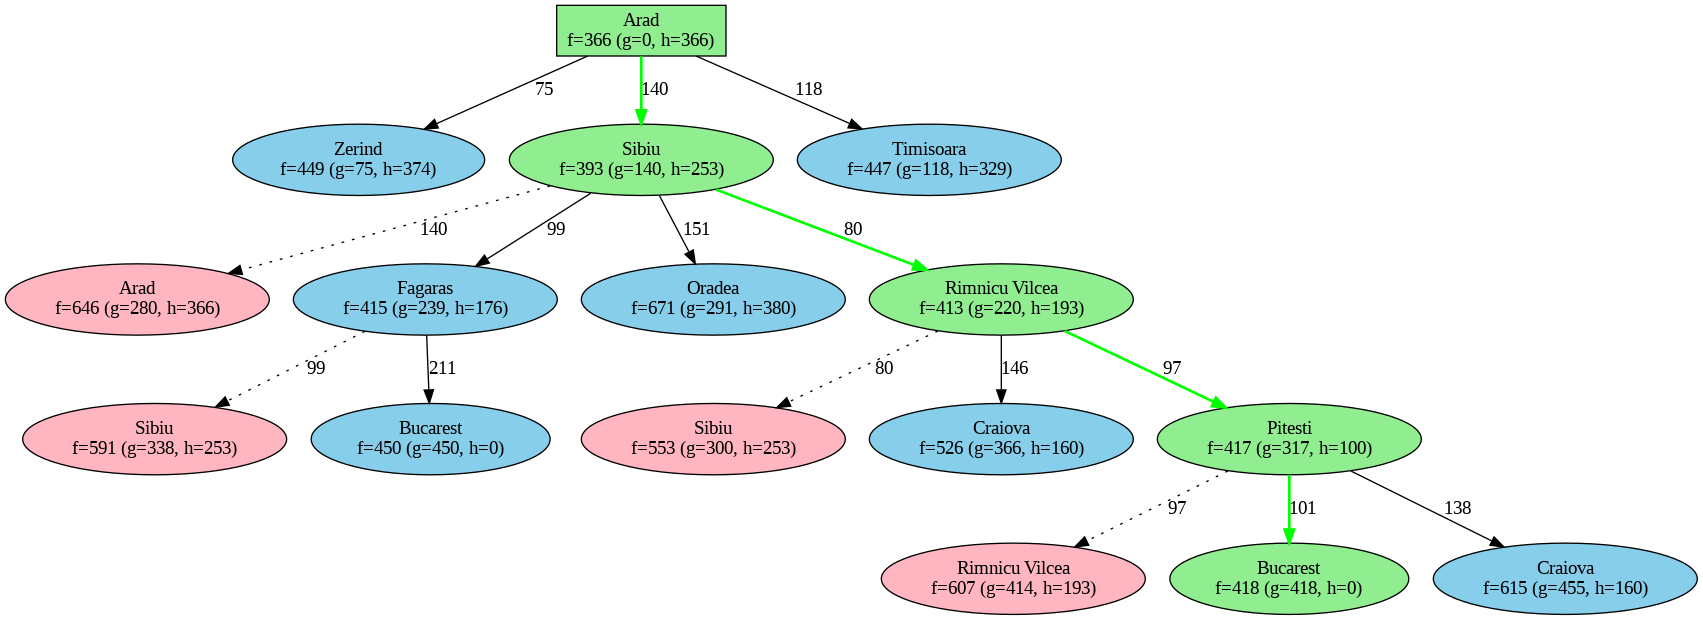

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
from matplotlib.animation import FuncAnimation
from graphviz import Digraph
import os
import tempfile
from IPython.display import Image, display
from graphviz import Digraph
import tempfile

class Grafo:
    def __init__(self):
        self.grafo = nx.DiGraph()
        self.heuristica = {}

    def agregar_nodo(self, nombre, heuristica_a_bucarest):
        self.grafo.add_node(nombre)
        self.heuristica[nombre] = heuristica_a_bucarest

    def agregar_conexion(self, origen, destino, peso):
        self.grafo.add_edge(origen, destino, peso=peso)
        self.grafo.add_edge(destino, origen, peso=peso)

    def obtener_vecinos(self, nodo):
        return [(vecino, self.grafo[nodo][vecino]['peso']) for vecino in self.grafo.neighbors(nodo)]

    def a_estrella(self, inicio, destino='Bucarest', visualizar=True):
        abiertos = [(self.heuristica[inicio], inicio, [inicio], 0)]
        heapq.heapify(abiertos)
        cerrados = set()
        historial_expansion = []

        while abiertos:
            f_actual, actual, camino, g_actual = heapq.heappop(abiertos)
            if actual in cerrados:
                continue
            if actual == destino:
                historial_expansion.append({
                    'nodo_actual': actual,
                    'camino_actual': camino.copy(),
                    'nodos_abiertos': [(f, n, p, g) for f, n, p, g in abiertos],
                    'nodos_cerrados': list(cerrados),
                    'ciudad': actual,
                    'f': f_actual,
                    'g': g_actual,
                    'h': self.heuristica[actual],
                    'hijos_generados': []
                })
                return camino, historial_expansion
            hijos_generados = []
            cerrados.add(actual)
            for vecino, peso in self.obtener_vecinos(actual):
                if vecino in cerrados:
                    continue
                g_vecino = g_actual + peso
                f_vecino = g_vecino + self.heuristica[vecino]
                nuevo_camino = camino + [vecino]
                hijos_generados.append({
                    'nodo': vecino,
                    'camino': nuevo_camino,
                    'g': g_vecino,
                    'h': self.heuristica[vecino],
                    'f': f_vecino
                })
                heapq.heappush(abiertos, (f_vecino, vecino, nuevo_camino, g_vecino))
            historial_expansion.append({
                'nodo_actual': actual,
                'camino_actual': camino.copy(),
                'nodos_abiertos': [(f, n, p, g) for f, n, p, g in abiertos],
                'nodos_cerrados': list(cerrados),
                'ciudad': actual,
                'f': f_actual,
                'g': g_actual,
                'h': self.heuristica[actual],
                'hijos_generados': hijos_generados
            })
        return None, historial_expansion

    def visualizar_proceso(self, historial_expansion, camino_final=None):
        if not historial_expansion:
            print("No hay datos para visualizar")
            return
        fig, ax = plt.subplots(figsize=(12, 10))
        pos = nx.spring_layout(self.grafo, seed=42)

        def actualizar(i):
            ax.clear()
            estado = historial_expansion[i]
            nodo_actual = estado['nodo_actual']
            camino_actual = estado['camino_actual']
            nodos_cerrados = estado['nodos_cerrados']
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, alpha=0.3)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, node_color='skyblue', node_size=500)
            if nodos_cerrados:
                nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=nodos_cerrados,
                                      node_color='grey', node_size=500)
            if len(camino_actual) > 1:
                nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=camino_actual[:-1],
                                      node_color='green', node_size=500)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=[nodo_actual],
                                  node_color='red', node_size=700)

            camino_edges = [(camino_actual[j], camino_actual[j+1]) for j in range(len(camino_actual)-1)]
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, edgelist=camino_edges,
                                  edge_color='green', width=3)

            nx.draw_networkx_labels(self.grafo, pos, ax=ax)
            edge_labels = {(u, v): d['peso'] for u, v, d in self.grafo.edges(data=True)}
            nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, ax=ax)
            ax.set_title(f"Paso {i+1}/{len(historial_expansion)}: Explorando {nodo_actual}")
            for nodo in self.grafo.nodes():
                x, y = pos[nodo]
                ax.text(x, y-0.08, f"h={self.heuristica[nodo]}",
                        horizontalalignment='center', size=9,
                        bbox=dict(facecolor='white', alpha=0.7))
        ani = FuncAnimation(fig, actualizar, frames=len(historial_expansion), interval=1000, repeat=False)
        if camino_final and len(camino_final) > 1:
            plt.pause(len(historial_expansion))

            ax.clear()
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, alpha=0.3)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, node_color='skyblue', node_size=500)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=camino_final,
                                  node_color='green', node_size=700)
            camino_edges = [(camino_final[j], camino_final[j+1]) for j in range(len(camino_final)-1)]
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, edgelist=camino_edges,
                                  edge_color='green', width=3)
            nx.draw_networkx_labels(self.grafo, pos, ax=ax)
            edge_labels = {(u, v): d['peso'] for u, v, d in self.grafo.edges(data=True)}
            nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, ax=ax)

            ax.set_title(f"Camino final encontrado: {' -> '.join(camino_final)}")

        plt.tight_layout()
        plt.show()

    def visualizar_arbol_busqueda(self, historial_expansion, camino_final=None, mostrar_grafico=True):

      if not historial_expansion:
          print("No hay datos para visualizar")
          return

      dot = Digraph(comment='Árbol de búsqueda A*', format='png')
      dot.attr(rankdir='TB')
      nodos_agregados = {}
      padres = {}

      def generar_id_nodo(ciudad, camino):
          return f"{ciudad}_{len(camino)}"
      for i, estado in enumerate(historial_expansion):
          nodo_actual = estado['nodo_actual']
          camino_actual = estado['camino_actual']
          id_nodo_actual = generar_id_nodo(nodo_actual, camino_actual)

          for hijo in estado['hijos_generados']:
              nodo_hijo = hijo['nodo']
              camino_hijo = hijo['camino']
              id_hijo = generar_id_nodo(nodo_hijo, camino_hijo)
              if id_hijo not in padres:
                  padres[id_hijo] = (id_nodo_actual, hijo['g'] - estado['g'])
      for i, estado in enumerate(historial_expansion):
          nodo_actual = estado['nodo_actual']
          camino_actual = estado['camino_actual']
          f_actual = estado['f']
          g_actual = estado['g']
          h_actual = estado['h']
          id_nodo_actual = generar_id_nodo(nodo_actual, camino_actual)

          nodo_en_camino_optimo = False
          if camino_final and nodo_actual in camino_final:
              posicion_actual = camino_actual.index(nodo_actual)
              if posicion_actual < len(camino_final) and camino_actual[:posicion_actual+1] == camino_final[:posicion_actual+1]:
                  nodo_en_camino_optimo = True

          if id_nodo_actual not in nodos_agregados:
              etiqueta = f"{nodo_actual}\nf={f_actual} (g={g_actual}, h={h_actual})"

              if nodo_actual == 'Bucarest' and nodo_en_camino_optimo:
                  color = 'palegreen'
              elif nodo_en_camino_optimo:
                  color = 'lightgreen'
              elif nodo_actual == 'Bucarest':
                  color = 'lightgreen'
              else:
                  color = 'lightcoral'

              dot.node(id_nodo_actual, etiqueta, style='filled',
                      fillcolor=color, shape='box')
              nodos_agregados[id_nodo_actual] = True

              if id_nodo_actual in padres:
                  padre_id, costo = padres[id_nodo_actual]
                  if padre_id in nodos_agregados:

                      estilo_arista = 'solid'
                      color_arista = 'black'
                      grosor = '1.0'

                      if nodo_en_camino_optimo:

                          for j, nodo_padre in enumerate(camino_final[:-1]):
                              if nodo_padre == camino_actual[posicion_actual-1] and nodo_actual == camino_final[j+1]:
                                  color_arista = 'green'
                                  grosor = '2.0'
                                  break

                      dot.edge(padre_id, id_nodo_actual, label=str(costo),
                              color=color_arista, penwidth=grosor)

          if nodo_actual != 'Bucarest':
              for vecino, peso in self.obtener_vecinos(nodo_actual):
                  g_potencial = g_actual + peso
                  h_potencial = self.heuristica[vecino]
                  f_potencial = g_potencial + h_potencial
                  camino_potencial = camino_actual + [vecino]
                  id_vecino_potencial = f"{vecino}_{len(camino_potencial)}_{i}_pot"

                  es_hijo_real = False
                  for hijo in estado['hijos_generados']:
                      if hijo['nodo'] == vecino:
                          es_hijo_real = True
                          break

                  if not es_hijo_real:
                      etiqueta_potencial = f"{vecino}\nf={f_potencial:.0f} (g={g_potencial:.0f}, h={h_potencial})"

                      color_potencial = 'lightgrey'
                      forma_potencial = 'ellipse'

                      if vecino in camino_actual:
                          color_potencial = 'lightpink'

                      dot.node(id_vecino_potencial, etiqueta_potencial, style='filled',
                              fillcolor=color_potencial, shape=forma_potencial)
                      nodos_agregados[id_vecino_potencial] = True

                      estilo_linea = 'dashed'
                      if vecino in camino_actual:
                          estilo_linea = 'dotted'

                      dot.edge(id_nodo_actual, id_vecino_potencial,
                              label=str(peso), style=estilo_linea)

          for hijo in estado['hijos_generados']:
              nodo_hijo = hijo['nodo']
              camino_hijo = hijo['camino']
              g_hijo = hijo['g']
              h_hijo = hijo['h']
              f_hijo = hijo['f']
              id_nodo_hijo = generar_id_nodo(nodo_hijo, camino_hijo)

              hijo_en_camino_optimo = False
              if camino_final and nodo_hijo in camino_final:
                  posicion_hijo = camino_hijo.index(nodo_hijo)
                  if posicion_hijo < len(camino_final) and camino_hijo[:posicion_hijo+1] == camino_final[:posicion_hijo+1]:
                      hijo_en_camino_optimo = True

              if id_nodo_hijo not in nodos_agregados:
                  etiqueta_hijo = f"{nodo_hijo}\nf={f_hijo} (g={g_hijo}, h={h_hijo})"

                  if hijo_en_camino_optimo:
                      color_hijo = 'lightgreen'
                  else:
                      color_hijo = 'skyblue'

                  dot.node(id_nodo_hijo, etiqueta_hijo, style='filled',
                          fillcolor=color_hijo, shape='ellipse')
                  nodos_agregados[id_nodo_hijo] = True

                  costo_paso = g_hijo - g_actual

                  color_arista = 'black'
                  grosor = '1.0'

                  if nodo_en_camino_optimo and hijo_en_camino_optimo:
                      color_arista = 'green'
                      grosor = '2.0'

                  dot.edge(id_nodo_actual, id_nodo_hijo, label=str(costo_paso),
                          color=color_arista, penwidth=grosor)

      try:
          with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:
              tmp_filename = tmp.name
          dot.render(tmp_filename, view=mostrar_grafico, cleanup=True)

          print(f"Árbol de búsqueda A* generado. {len(nodos_agregados)} nodos explorados.")
          try:
              from IPython.display import Image, display
              display(Image(tmp_filename + '.png'))
          except ImportError:
              pass

      except Exception as e:
          print(f"Error al generar la visualización: {e}")
          print("Asegúrese de tener instalado Graphviz.")

def main():
    grafo = Grafo()
    grafo.agregar_nodo("Arad", 366)
    grafo.agregar_nodo("Bucarest", 0)
    grafo.agregar_nodo("Craiova", 160)
    grafo.agregar_nodo("Drobeta", 242)
    grafo.agregar_nodo("Eforie", 161)
    grafo.agregar_nodo("Fagaras", 176)
    grafo.agregar_nodo("Giurgiu", 77)
    grafo.agregar_nodo("Hirsova", 151)
    grafo.agregar_nodo("Iasi", 226)
    grafo.agregar_nodo("Lugoj", 244)
    grafo.agregar_nodo("Mehadia", 241)
    grafo.agregar_nodo("Neamt", 234)
    grafo.agregar_nodo("Oradea", 380)
    grafo.agregar_nodo("Pitesti", 100)
    grafo.agregar_nodo("Rimnicu Vilcea", 193)
    grafo.agregar_nodo("Sibiu", 253)
    grafo.agregar_nodo("Timisoara", 329)
    grafo.agregar_nodo("Urziceni", 80)
    grafo.agregar_nodo("Vaslui", 199)
    grafo.agregar_nodo("Zerind", 374)

    grafo.agregar_conexion("Arad", "Zerind", 75)
    grafo.agregar_conexion("Arad", "Sibiu", 140)
    grafo.agregar_conexion("Arad", "Timisoara", 118)
    grafo.agregar_conexion("Bucarest", "Fagaras", 211)
    grafo.agregar_conexion("Bucarest", "Pitesti", 101)
    grafo.agregar_conexion("Bucarest", "Giurgiu", 90)
    grafo.agregar_conexion("Bucarest", "Urziceni", 85)
    grafo.agregar_conexion("Craiova", "Drobeta", 120)
    grafo.agregar_conexion("Craiova", "Rimnicu Vilcea", 146)
    grafo.agregar_conexion("Craiova", "Pitesti", 138)
    grafo.agregar_conexion("Drobeta", "Mehadia", 75)
    grafo.agregar_conexion("Eforie", "Hirsova", 86)
    grafo.agregar_conexion("Fagaras", "Sibiu", 99)
    grafo.agregar_conexion("Hirsova", "Urziceni", 98)
    grafo.agregar_conexion("Iasi", "Vaslui", 92)
    grafo.agregar_conexion("Iasi", "Neamt", 87)
    grafo.agregar_conexion("Lugoj", "Timisoara", 111)
    grafo.agregar_conexion("Lugoj", "Mehadia", 70)
    grafo.agregar_conexion("Oradea", "Zerind", 71)
    grafo.agregar_conexion("Oradea", "Sibiu", 151)
    grafo.agregar_conexion("Pitesti", "Rimnicu Vilcea", 97)
    grafo.agregar_conexion("Rimnicu Vilcea", "Sibiu", 80)
    grafo.agregar_conexion("Urziceni", "Vaslui", 142)

    ciudades_disponibles = sorted(list(grafo.grafo.nodes()))
    print("Ciudades disponibles:")
    for i, ciudad in enumerate(ciudades_disponibles, 1):
        print(f"{i}. {ciudad}")

    while True:
        ciudad_inicio = input("\nIngrese el nombre de la ciudad de inicio: ")
        if ciudad_inicio in grafo.grafo.nodes():
            break
        else:
            print(f"Ciudad '{ciudad_inicio}' no encontrada. Por favor, intente de nuevo.")

    print(f"\nBuscando ruta más corta de {ciudad_inicio} a Bucarest...")

    tiempo_inicio = time.time()
    camino, historial = grafo.a_estrella(ciudad_inicio)
    tiempo_fin = time.time()

    if camino:
        print("\n¡Camino encontrado!")
        print(" -> ".join(camino))

        distancia_total = 0
        for i in range(len(camino) - 1):
            distancia_total += grafo.grafo[camino[i]][camino[i+1]]['peso']

        print(f"Distancia total: {distancia_total} km")
        print(f"Tiempo de ejecución: {tiempo_fin - tiempo_inicio:.4f} segundos")
        print(f"Nodos explorados: {len(historial)}")

        print("\nVisualizando el proceso de búsqueda en el mapa...")
        grafo.visualizar_proceso(historial, camino)

        print("\nGenerando visualización del árbol de búsqueda A*...")
        grafo.visualizar_arbol_busqueda(historial, camino_final=camino)


    else:
        print("No se encontró un camino a Bucarest")

if __name__ == "__main__":
    main()

Ciudades disponibles:
1. Arad
2. Bucarest
3. Craiova
4. Drobeta
5. Eforie
6. Fagaras
7. Giurgiu
8. Hirsova
9. Iasi
10. Lugoj
11. Mehadia
12. Neamt
13. Oradea
14. Pitesti
15. Rimnicu Vilcea
16. Sibiu
17. Timisoara
18. Urziceni
19. Vaslui
20. Zerind

Ingrese el nombre de la ciudad de inicio: Mehadia

Buscando ruta más corta de Mehadia a Bucarest...

¡Camino encontrado!
Mehadia -> Drobeta -> Craiova -> Pitesti -> Bucarest
Distancia total: 434 km
Tiempo de ejecución: 0.0002 segundos
Nodos explorados: 6

Visualizando el proceso de búsqueda en el mapa...


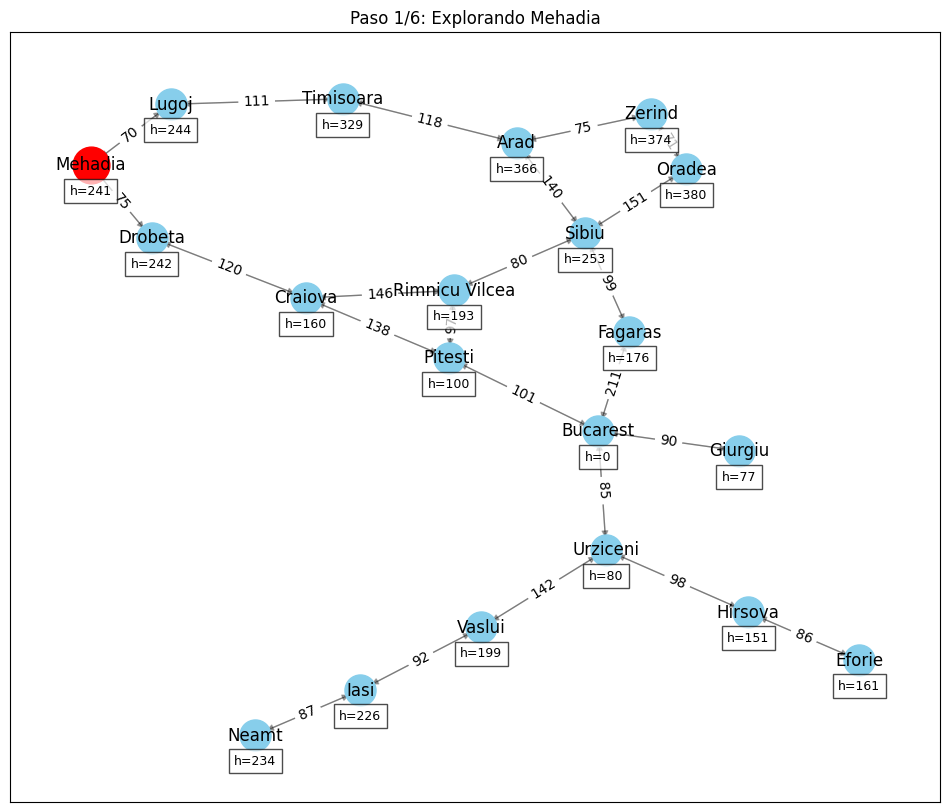

<Figure size 640x480 with 0 Axes>


Generando visualización del árbol de búsqueda A*...
Árbol de búsqueda A* generado. 13 nodos explorados.


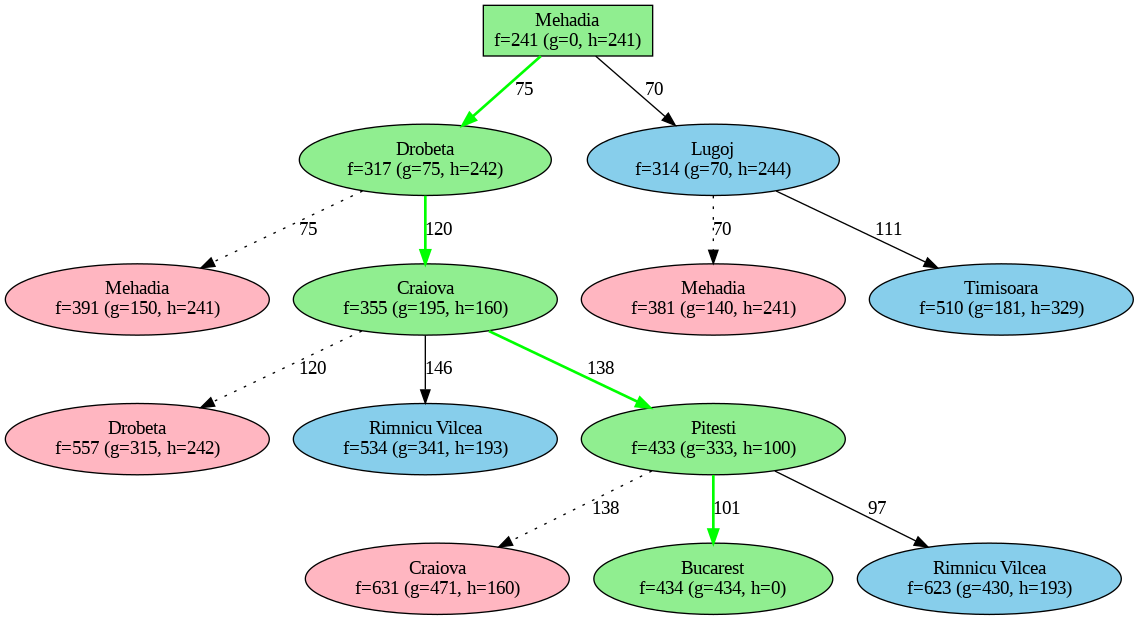

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import time
from matplotlib.animation import FuncAnimation
from graphviz import Digraph
import os
import tempfile
from IPython.display import Image, display
from graphviz import Digraph
import tempfile

class Grafo:
    def __init__(self):
        self.grafo = nx.DiGraph()
        self.heuristica = {}

    def agregar_nodo(self, nombre, heuristica_a_bucarest):
        self.grafo.add_node(nombre)
        self.heuristica[nombre] = heuristica_a_bucarest

    def agregar_conexion(self, origen, destino, peso):
        self.grafo.add_edge(origen, destino, peso=peso)
        self.grafo.add_edge(destino, origen, peso=peso)

    def obtener_vecinos(self, nodo):
        return [(vecino, self.grafo[nodo][vecino]['peso']) for vecino in self.grafo.neighbors(nodo)]

    def a_estrella(self, inicio, destino='Bucarest', visualizar=True):
        abiertos = [(self.heuristica[inicio], inicio, [inicio], 0)]
        heapq.heapify(abiertos)
        cerrados = set()
        historial_expansion = []

        while abiertos:
            f_actual, actual, camino, g_actual = heapq.heappop(abiertos)
            if actual in cerrados:
                continue
            if actual == destino:
                historial_expansion.append({
                    'nodo_actual': actual,
                    'camino_actual': camino.copy(),
                    'nodos_abiertos': [(f, n, p, g) for f, n, p, g in abiertos],
                    'nodos_cerrados': list(cerrados),
                    'ciudad': actual,
                    'f': f_actual,
                    'g': g_actual,
                    'h': self.heuristica[actual],
                    'hijos_generados': []
                })
                return camino, historial_expansion
            hijos_generados = []
            cerrados.add(actual)
            for vecino, peso in self.obtener_vecinos(actual):
                if vecino in cerrados:
                    continue
                g_vecino = g_actual + peso
                f_vecino = g_vecino + self.heuristica[vecino]
                nuevo_camino = camino + [vecino]
                hijos_generados.append({
                    'nodo': vecino,
                    'camino': nuevo_camino,
                    'g': g_vecino,
                    'h': self.heuristica[vecino],
                    'f': f_vecino
                })
                heapq.heappush(abiertos, (f_vecino, vecino, nuevo_camino, g_vecino))
            historial_expansion.append({
                'nodo_actual': actual,
                'camino_actual': camino.copy(),
                'nodos_abiertos': [(f, n, p, g) for f, n, p, g in abiertos],
                'nodos_cerrados': list(cerrados),
                'ciudad': actual,
                'f': f_actual,
                'g': g_actual,
                'h': self.heuristica[actual],
                'hijos_generados': hijos_generados
            })
        return None, historial_expansion

    def visualizar_proceso(self, historial_expansion, camino_final=None):
        if not historial_expansion:
            print("No hay datos para visualizar")
            return
        fig, ax = plt.subplots(figsize=(12, 10))
        pos = nx.spring_layout(self.grafo, seed=42)

        def actualizar(i):
            ax.clear()
            estado = historial_expansion[i]
            nodo_actual = estado['nodo_actual']
            camino_actual = estado['camino_actual']
            nodos_cerrados = estado['nodos_cerrados']
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, alpha=0.3)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, node_color='skyblue', node_size=500)
            if nodos_cerrados:
                nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=nodos_cerrados,
                                      node_color='grey', node_size=500)
            if len(camino_actual) > 1:
                nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=camino_actual[:-1],
                                      node_color='green', node_size=500)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=[nodo_actual],
                                  node_color='red', node_size=700)

            camino_edges = [(camino_actual[j], camino_actual[j+1]) for j in range(len(camino_actual)-1)]
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, edgelist=camino_edges,
                                  edge_color='green', width=3)

            nx.draw_networkx_labels(self.grafo, pos, ax=ax)
            edge_labels = {(u, v): d['peso'] for u, v, d in self.grafo.edges(data=True)}
            nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, ax=ax)
            ax.set_title(f"Paso {i+1}/{len(historial_expansion)}: Explorando {nodo_actual}")
            for nodo in self.grafo.nodes():
                x, y = pos[nodo]
                ax.text(x, y-0.08, f"h={self.heuristica[nodo]}",
                        horizontalalignment='center', size=9,
                        bbox=dict(facecolor='white', alpha=0.7))
        ani = FuncAnimation(fig, actualizar, frames=len(historial_expansion), interval=1000, repeat=False)
        if camino_final and len(camino_final) > 1:
            plt.pause(len(historial_expansion))

            ax.clear()
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, alpha=0.3)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, node_color='skyblue', node_size=500)
            nx.draw_networkx_nodes(self.grafo, pos, ax=ax, nodelist=camino_final,
                                  node_color='green', node_size=700)
            camino_edges = [(camino_final[j], camino_final[j+1]) for j in range(len(camino_final)-1)]
            nx.draw_networkx_edges(self.grafo, pos, ax=ax, edgelist=camino_edges,
                                  edge_color='green', width=3)
            nx.draw_networkx_labels(self.grafo, pos, ax=ax)
            edge_labels = {(u, v): d['peso'] for u, v, d in self.grafo.edges(data=True)}
            nx.draw_networkx_edge_labels(self.grafo, pos, edge_labels=edge_labels, ax=ax)

            ax.set_title(f"Camino final encontrado: {' -> '.join(camino_final)}")

        plt.tight_layout()
        plt.show()

    def visualizar_arbol_busqueda(self, historial_expansion, camino_final=None, mostrar_grafico=True):

      if not historial_expansion:
          print("No hay datos para visualizar")
          return

      dot = Digraph(comment='Árbol de búsqueda A*', format='png')
      dot.attr(rankdir='TB')
      nodos_agregados = {}
      padres = {}

      def generar_id_nodo(ciudad, camino):
          return f"{ciudad}_{len(camino)}"
      for i, estado in enumerate(historial_expansion):
          nodo_actual = estado['nodo_actual']
          camino_actual = estado['camino_actual']
          id_nodo_actual = generar_id_nodo(nodo_actual, camino_actual)

          for hijo in estado['hijos_generados']:
              nodo_hijo = hijo['nodo']
              camino_hijo = hijo['camino']
              id_hijo = generar_id_nodo(nodo_hijo, camino_hijo)
              if id_hijo not in padres:
                  padres[id_hijo] = (id_nodo_actual, hijo['g'] - estado['g'])
      for i, estado in enumerate(historial_expansion):
          nodo_actual = estado['nodo_actual']
          camino_actual = estado['camino_actual']
          f_actual = estado['f']
          g_actual = estado['g']
          h_actual = estado['h']
          id_nodo_actual = generar_id_nodo(nodo_actual, camino_actual)

          nodo_en_camino_optimo = False
          if camino_final and nodo_actual in camino_final:
              posicion_actual = camino_actual.index(nodo_actual)
              if posicion_actual < len(camino_final) and camino_actual[:posicion_actual+1] == camino_final[:posicion_actual+1]:
                  nodo_en_camino_optimo = True

          if id_nodo_actual not in nodos_agregados:
              etiqueta = f"{nodo_actual}\nf={f_actual} (g={g_actual}, h={h_actual})"

              if nodo_actual == 'Bucarest' and nodo_en_camino_optimo:
                  color = 'palegreen'
              elif nodo_en_camino_optimo:
                  color = 'lightgreen'
              elif nodo_actual == 'Bucarest':
                  color = 'lightgreen'
              else:
                  color = 'lightcoral'

              dot.node(id_nodo_actual, etiqueta, style='filled',
                      fillcolor=color, shape='box')
              nodos_agregados[id_nodo_actual] = True

              if id_nodo_actual in padres:
                  padre_id, costo = padres[id_nodo_actual]
                  if padre_id in nodos_agregados:

                      estilo_arista = 'solid'
                      color_arista = 'black'
                      grosor = '1.0'

                      if nodo_en_camino_optimo:

                          for j, nodo_padre in enumerate(camino_final[:-1]):
                              if nodo_padre == camino_actual[posicion_actual-1] and nodo_actual == camino_final[j+1]:
                                  color_arista = 'green'
                                  grosor = '2.0'
                                  break

                      dot.edge(padre_id, id_nodo_actual, label=str(costo),
                              color=color_arista, penwidth=grosor)

          if nodo_actual != 'Bucarest':
              for vecino, peso in self.obtener_vecinos(nodo_actual):
                  g_potencial = g_actual + peso
                  h_potencial = self.heuristica[vecino]
                  f_potencial = g_potencial + h_potencial
                  camino_potencial = camino_actual + [vecino]
                  id_vecino_potencial = f"{vecino}_{len(camino_potencial)}_{i}_pot"

                  es_hijo_real = False
                  for hijo in estado['hijos_generados']:
                      if hijo['nodo'] == vecino:
                          es_hijo_real = True
                          break

                  if not es_hijo_real:
                      etiqueta_potencial = f"{vecino}\nf={f_potencial:.0f} (g={g_potencial:.0f}, h={h_potencial})"

                      color_potencial = 'lightgrey'
                      forma_potencial = 'ellipse'

                      if vecino in camino_actual:
                          color_potencial = 'lightpink'

                      dot.node(id_vecino_potencial, etiqueta_potencial, style='filled',
                              fillcolor=color_potencial, shape=forma_potencial)
                      nodos_agregados[id_vecino_potencial] = True

                      estilo_linea = 'dashed'
                      if vecino in camino_actual:
                          estilo_linea = 'dotted'

                      dot.edge(id_nodo_actual, id_vecino_potencial,
                              label=str(peso), style=estilo_linea)

          for hijo in estado['hijos_generados']:
              nodo_hijo = hijo['nodo']
              camino_hijo = hijo['camino']
              g_hijo = hijo['g']
              h_hijo = hijo['h']
              f_hijo = hijo['f']
              id_nodo_hijo = generar_id_nodo(nodo_hijo, camino_hijo)

              hijo_en_camino_optimo = False
              if camino_final and nodo_hijo in camino_final:
                  posicion_hijo = camino_hijo.index(nodo_hijo)
                  if posicion_hijo < len(camino_final) and camino_hijo[:posicion_hijo+1] == camino_final[:posicion_hijo+1]:
                      hijo_en_camino_optimo = True

              if id_nodo_hijo not in nodos_agregados:
                  etiqueta_hijo = f"{nodo_hijo}\nf={f_hijo} (g={g_hijo}, h={h_hijo})"

                  if hijo_en_camino_optimo:
                      color_hijo = 'lightgreen'
                  else:
                      color_hijo = 'skyblue'

                  dot.node(id_nodo_hijo, etiqueta_hijo, style='filled',
                          fillcolor=color_hijo, shape='ellipse')
                  nodos_agregados[id_nodo_hijo] = True

                  costo_paso = g_hijo - g_actual

                  color_arista = 'black'
                  grosor = '1.0'

                  if nodo_en_camino_optimo and hijo_en_camino_optimo:
                      color_arista = 'green'
                      grosor = '2.0'

                  dot.edge(id_nodo_actual, id_nodo_hijo, label=str(costo_paso),
                          color=color_arista, penwidth=grosor)

      try:
          with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:
              tmp_filename = tmp.name
          dot.render(tmp_filename, view=mostrar_grafico, cleanup=True)

          print(f"Árbol de búsqueda A* generado. {len(nodos_agregados)} nodos explorados.")
          try:
              from IPython.display import Image, display
              display(Image(tmp_filename + '.png'))
          except ImportError:
              pass

      except Exception as e:
          print(f"Error al generar la visualización: {e}")
          print("Asegúrese de tener instalado Graphviz.")

def main():
    grafo = Grafo()
    grafo.agregar_nodo("Arad", 366)
    grafo.agregar_nodo("Bucarest", 0)
    grafo.agregar_nodo("Craiova", 160)
    grafo.agregar_nodo("Drobeta", 242)
    grafo.agregar_nodo("Eforie", 161)
    grafo.agregar_nodo("Fagaras", 176)
    grafo.agregar_nodo("Giurgiu", 77)
    grafo.agregar_nodo("Hirsova", 151)
    grafo.agregar_nodo("Iasi", 226)
    grafo.agregar_nodo("Lugoj", 244)
    grafo.agregar_nodo("Mehadia", 241)
    grafo.agregar_nodo("Neamt", 234)
    grafo.agregar_nodo("Oradea", 380)
    grafo.agregar_nodo("Pitesti", 100)
    grafo.agregar_nodo("Rimnicu Vilcea", 193)
    grafo.agregar_nodo("Sibiu", 253)
    grafo.agregar_nodo("Timisoara", 329)
    grafo.agregar_nodo("Urziceni", 80)
    grafo.agregar_nodo("Vaslui", 199)
    grafo.agregar_nodo("Zerind", 374)

    grafo.agregar_conexion("Arad", "Zerind", 75)
    grafo.agregar_conexion("Arad", "Sibiu", 140)
    grafo.agregar_conexion("Arad", "Timisoara", 118)
    grafo.agregar_conexion("Bucarest", "Fagaras", 211)
    grafo.agregar_conexion("Bucarest", "Pitesti", 101)
    grafo.agregar_conexion("Bucarest", "Giurgiu", 90)
    grafo.agregar_conexion("Bucarest", "Urziceni", 85)
    grafo.agregar_conexion("Craiova", "Drobeta", 120)
    grafo.agregar_conexion("Craiova", "Rimnicu Vilcea", 146)
    grafo.agregar_conexion("Craiova", "Pitesti", 138)
    grafo.agregar_conexion("Drobeta", "Mehadia", 75)
    grafo.agregar_conexion("Eforie", "Hirsova", 86)
    grafo.agregar_conexion("Fagaras", "Sibiu", 99)
    grafo.agregar_conexion("Hirsova", "Urziceni", 98)
    grafo.agregar_conexion("Iasi", "Vaslui", 92)
    grafo.agregar_conexion("Iasi", "Neamt", 87)
    grafo.agregar_conexion("Lugoj", "Timisoara", 111)
    grafo.agregar_conexion("Lugoj", "Mehadia", 70)
    grafo.agregar_conexion("Oradea", "Zerind", 71)
    grafo.agregar_conexion("Oradea", "Sibiu", 151)
    grafo.agregar_conexion("Pitesti", "Rimnicu Vilcea", 97)
    grafo.agregar_conexion("Rimnicu Vilcea", "Sibiu", 80)
    grafo.agregar_conexion("Urziceni", "Vaslui", 142)

    ciudades_disponibles = sorted(list(grafo.grafo.nodes()))
    print("Ciudades disponibles:")
    for i, ciudad in enumerate(ciudades_disponibles, 1):
        print(f"{i}. {ciudad}")

    while True:
        ciudad_inicio = input("\nIngrese el nombre de la ciudad de inicio: ")
        if ciudad_inicio in grafo.grafo.nodes():
            break
        else:
            print(f"Ciudad '{ciudad_inicio}' no encontrada. Por favor, intente de nuevo.")

    print(f"\nBuscando ruta más corta de {ciudad_inicio} a Bucarest...")

    tiempo_inicio = time.time()
    camino, historial = grafo.a_estrella(ciudad_inicio)
    tiempo_fin = time.time()

    if camino:
        print("\n¡Camino encontrado!")
        print(" -> ".join(camino))

        distancia_total = 0
        for i in range(len(camino) - 1):
            distancia_total += grafo.grafo[camino[i]][camino[i+1]]['peso']

        print(f"Distancia total: {distancia_total} km")
        print(f"Tiempo de ejecución: {tiempo_fin - tiempo_inicio:.4f} segundos")
        print(f"Nodos explorados: {len(historial)}")

        print("\nVisualizando el proceso de búsqueda en el mapa...")
        grafo.visualizar_proceso(historial, camino)

        print("\nGenerando visualización del árbol de búsqueda A*...")
        grafo.visualizar_arbol_busqueda(historial, camino_final=camino)


    else:
        print("No se encontró un camino a Bucarest")

if __name__ == "__main__":
    main()